In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from helper import (
    build_pattern_feature_table,
    pattern_k_selection,
    run_pattern_clustering,
    verify_mask_groups,
    plot_masking_performance,
    plot_masking_pca,
    plot_masking_performance_final,
    verify_mask_groups_compact
)

PERF_PATH = "../../data/RQ2/f1res.csv"
FEATURE_PATH = "../../data/RQ2/background_traffic_full.csv"

In [2]:
df_pat = build_pattern_feature_table(PERF_PATH)
df_pat.head()

,device,f1_idle,f1_active,drop_abs,drop_rel,rank_shift
0,samsungtvsmall,77.84,81.25,-3.41,-0.043808,-14.0
1,google1d15,90.91,67.61,23.30,0.256297,11.5
2,toshiba,92.05,69.32,22.73,0.246931,13.0
3,echodot5,82.39,63.64,18.75,0.227576,4.0
4,echodot3,92.42,75.57,16.85,0.182320,8.0


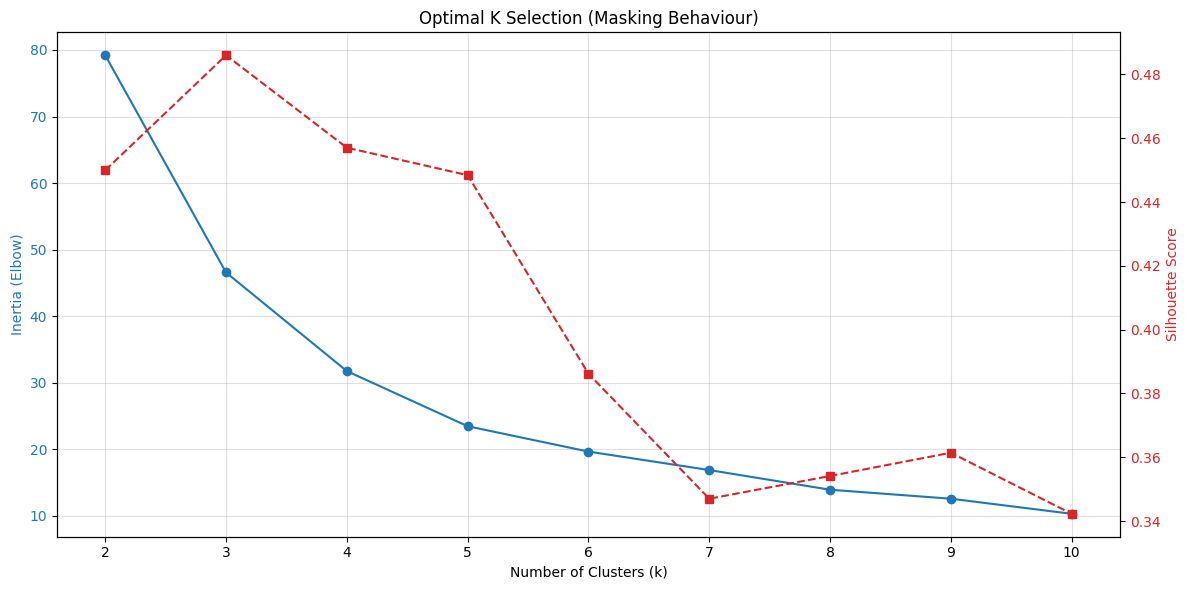

Best K from silhouette 3


3

In [3]:
best_k = pattern_k_selection(df_pat, k_min=2, k_max=10)
best_k


In [4]:
df_pat_clustered, X_pca = run_pattern_clustering(df_pat, k=4)
df_pat_clustered


,device,f1_idle,f1_active,drop_abs,drop_rel,rank_shift,mask_cluster
0,samsungtvsmall,77.84,81.25,-3.41,-0.043808,-14.0,3
1,google1d15,90.91,67.61,23.30,0.256297,11.5,2
2,toshiba,92.05,69.32,22.73,0.246931,13.0,2
3,echodot5,82.39,63.64,18.75,0.227576,4.0,2
4,echodot3,92.42,75.57,16.85,0.182320,8.0,2
5,antela,88.07,72.73,15.34,0.174180,-3.0,2
6,appletv,92.44,81.09,11.35,0.122782,6.0,0
7,cosori,89.20,70.45,18.75,0.210202,3.0,2
8,lepro,96.59,86.36,10.23,0.105912,7.0,0
9,bose,90.91,71.02,19.89,0.218788,5.5,2


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


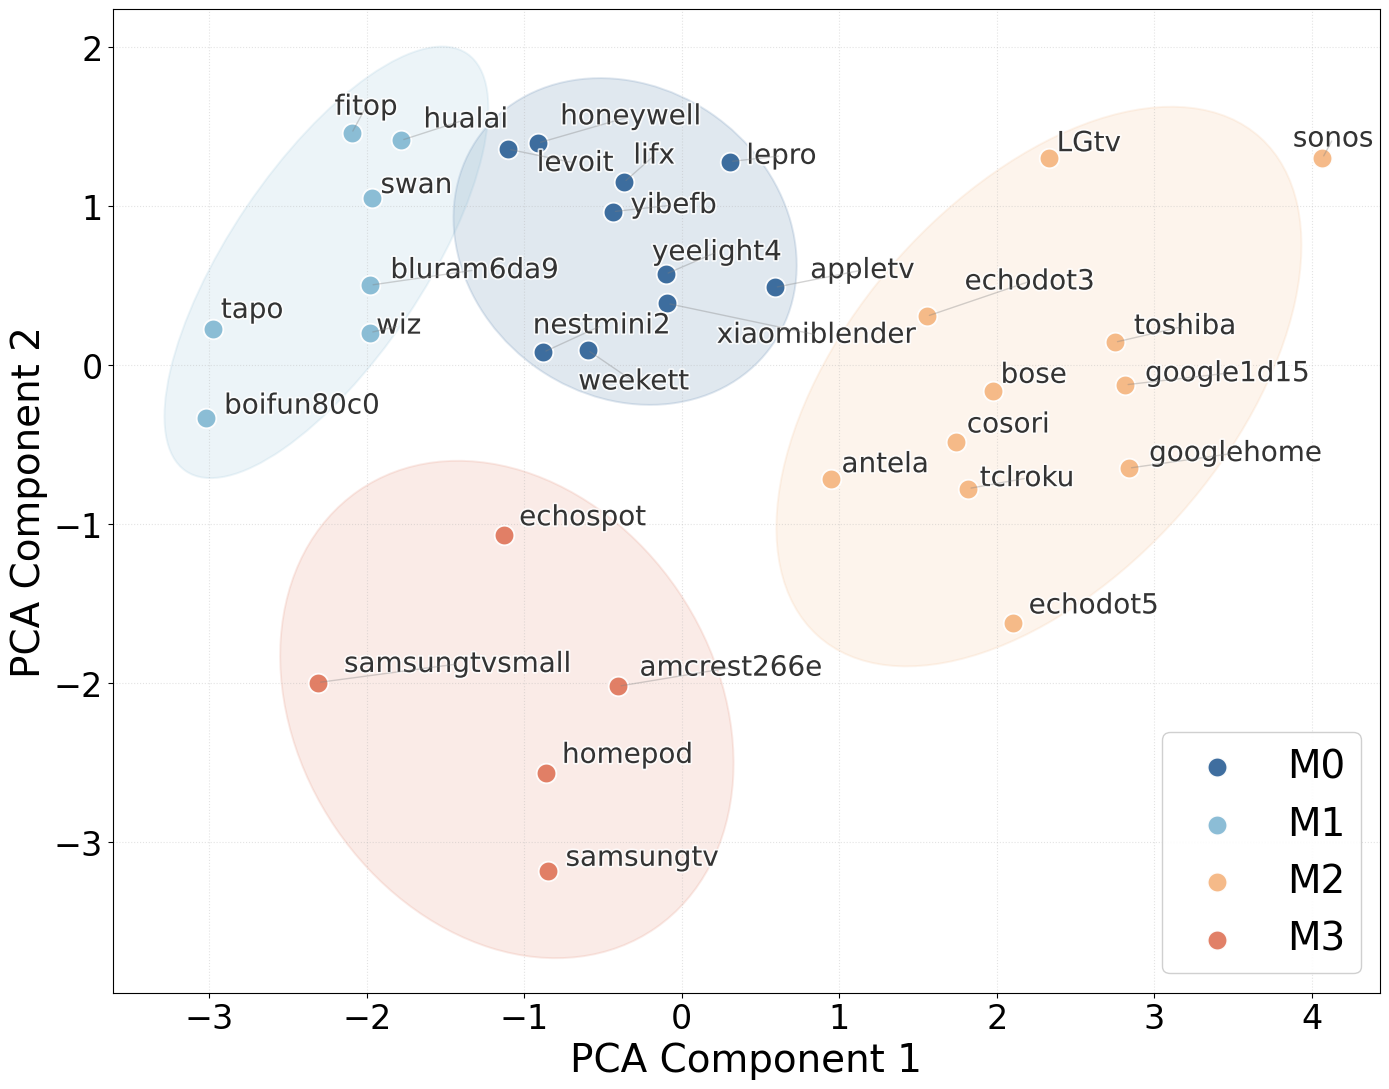

In [5]:
plot_masking_pca(df_pat_clustered, X_pca)

In [6]:
for cid in sorted(df_pat_clustered.mask_cluster.unique()):
    group_devices = df_pat_clustered[df_pat_clustered.mask_cluster == cid].device.tolist()
    print("Mask group", cid)
    print(group_devices)
    print()

Mask group 0
['appletv', 'lepro', 'xiaomiblender', 'yeelight4', 'lifx', 'yibefb', 'weekett', 'nestmini2', 'honeywell', 'levoit']

Mask group 1
['hualai', 'wiz', 'bluram6da9', 'swan', 'fitop', 'boifun80c0', 'tapo']

Mask group 2
['google1d15', 'toshiba', 'echodot5', 'echodot3', 'antela', 'cosori', 'bose', 'tclroku', 'googlehome', 'sonos', 'LGtv']

Mask group 3
['samsungtvsmall', 'amcrest266e', 'echospot', 'homepod', 'samsungtv']



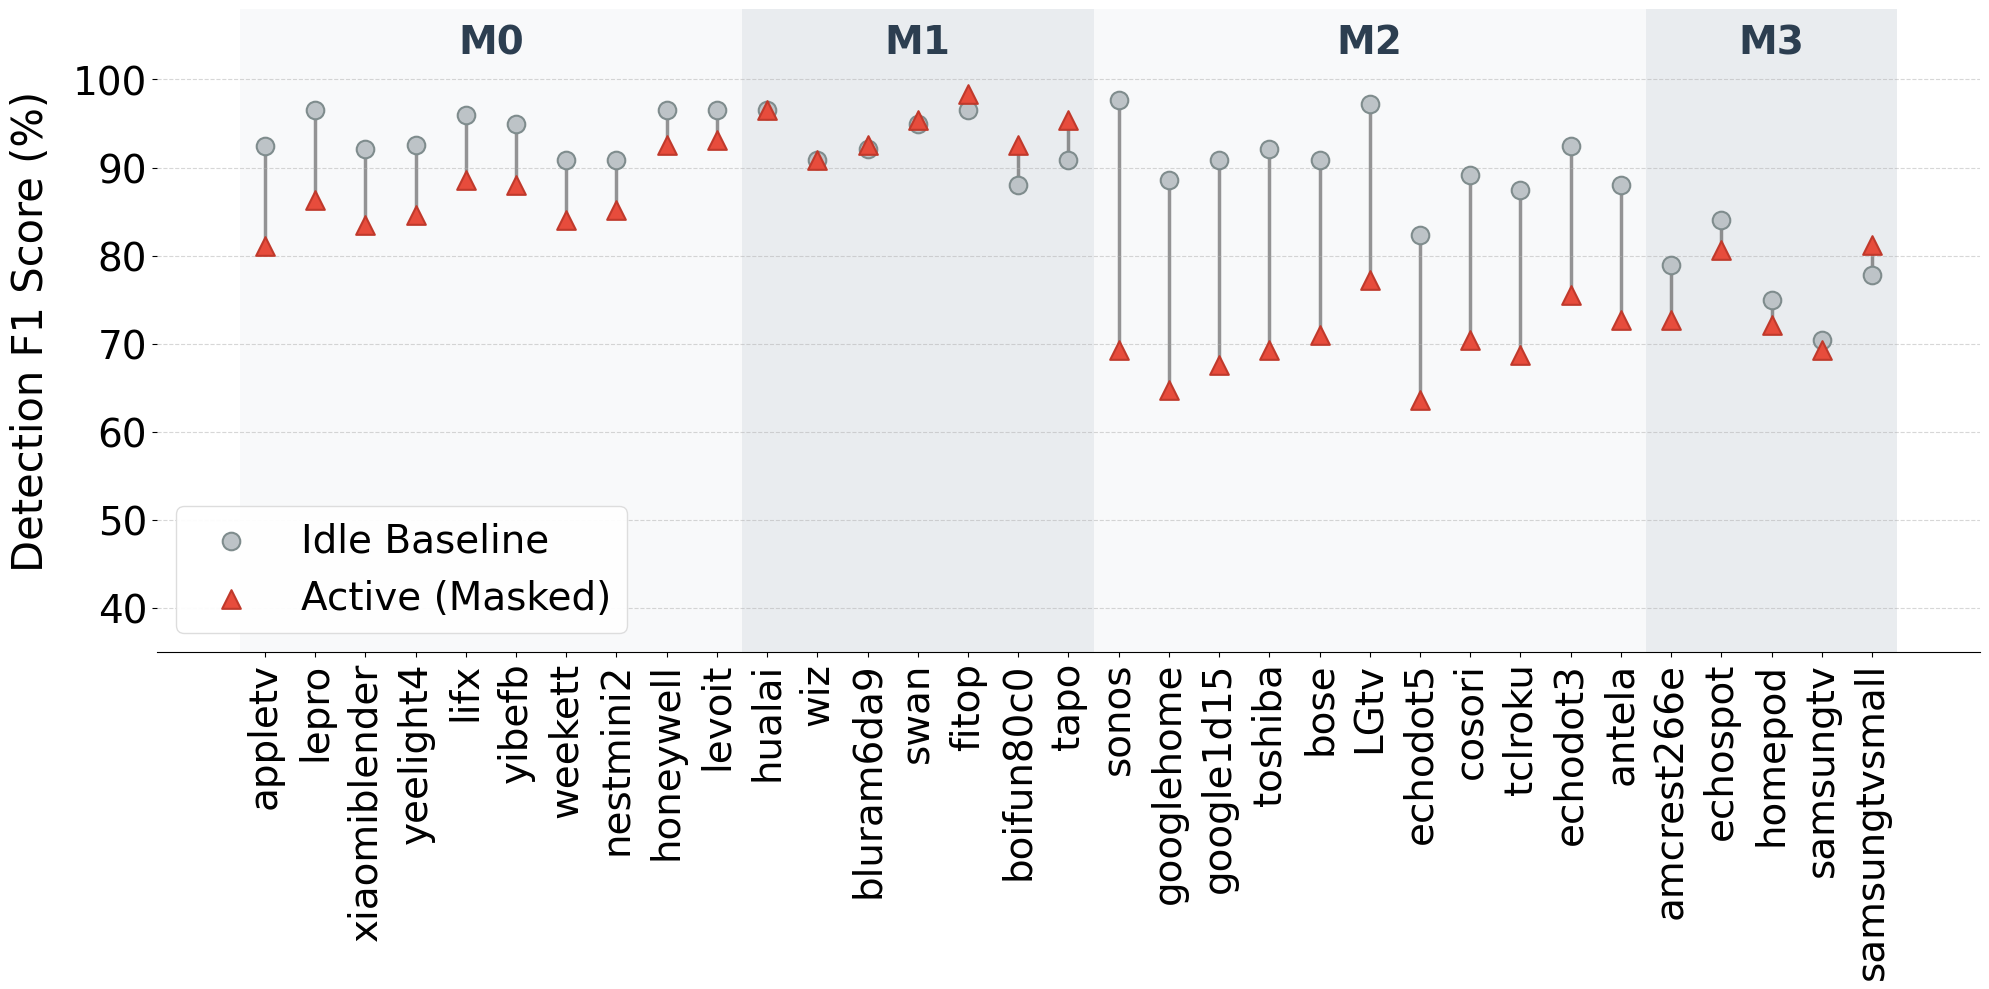

,device,mask_cluster,f1_idle,f1_active,Difference
0,appletv,0,92.44,81.09,11.35
1,lepro,0,96.59,86.36,10.23
2,xiaomiblender,0,92.05,83.52,8.53
3,yeelight4,0,92.61,84.66,7.95
4,lifx,0,96.02,88.64,7.38
5,yibefb,0,94.89,88.07,6.82
6,weekett,0,90.91,84.09,6.82
7,nestmini2,0,90.91,85.23,5.68
8,honeywell,0,96.59,92.61,3.98
9,levoit,0,96.59,93.18,3.41


In [7]:
plot_masking_performance_final(df_pat_clustered, PERF_PATH)

In [8]:
def summarise_mask_clusters(df_pat, perf_csv):
    perf = pd.read_csv(perf_csv)

    for col in ["f1_idle", "f1_active"]:
        if perf[col].dtype == object:
            perf[col] = perf[col].str.replace("%", "").astype(float)

    df = pd.merge(df_pat[["device", "mask_cluster"]], perf, on="device", how="inner")

    df["drop_abs"] = df["f1_idle"] - df["f1_active"]
    df["drop_rel"] = df["drop_abs"] / df["f1_idle"] * 100

    rows = []

    for cid in sorted(df.mask_cluster.unique()):
        sub = df[df.mask_cluster == cid]
        n = len(sub)

        idle_mean = sub["f1_idle"].mean()
        idle_std = sub["f1_idle"].std()

        active_mean = sub["f1_active"].mean()
        active_std = sub["f1_active"].std()

        drop_abs_mean = sub["drop_abs"].mean()
        drop_abs_std = sub["drop_abs"].std()

        drop_rel_mean = sub["drop_rel"].mean()
        drop_rel_std = sub["drop_rel"].std()

        rows.append([
            f"M{cid}",
            n,
            f"{idle_mean:.2f} ± {idle_std:.2f}" if n > 1 else f"{idle_mean:.2f}",
            f"{active_mean:.2f} ± {active_std:.2f}" if n > 1 else f"{active_mean:.2f}",
            f"{drop_abs_mean:.2f} ± {drop_abs_std:.2f}" if n > 1 else f"{drop_abs_mean:.2f}",
            f"{drop_rel_mean:.3f} ± {drop_rel_std:.3f}" if n > 1 else f"{drop_rel_mean:.3f}"
        ])

    table = pd.DataFrame(rows, columns=[
        "Cluster", 
        "N", 
        "Idle F1 (%)", 
        "Active F1 (%)", 
        "Absolute Drop (%)",
        "Relative Drop (%)"
    ])

    return table

table_mask = summarise_mask_clusters(df_pat_clustered, PERF_PATH)
table_mask


,Cluster,N,Idle F1 (%),Active F1 (%),Absolute Drop (%),Relative Drop (%)
0,M0,10,93.96 ± 2.41,86.75 ± 3.91,7.21 ± 2.50,7.699 ± 2.691
1,M1,7,92.86 ± 3.24,94.56 ± 2.60,-1.70 ± 2.02,-1.874 ± 2.265
2,M2,11,90.63 ± 4.33,70.04 ± 4.11,20.59 ± 3.68,22.680 ± 3.583
3,M3,5,77.27 ± 5.04,75.23 ± 5.40,2.04 ± 3.56,2.596 ± 4.513


Feature Investigation

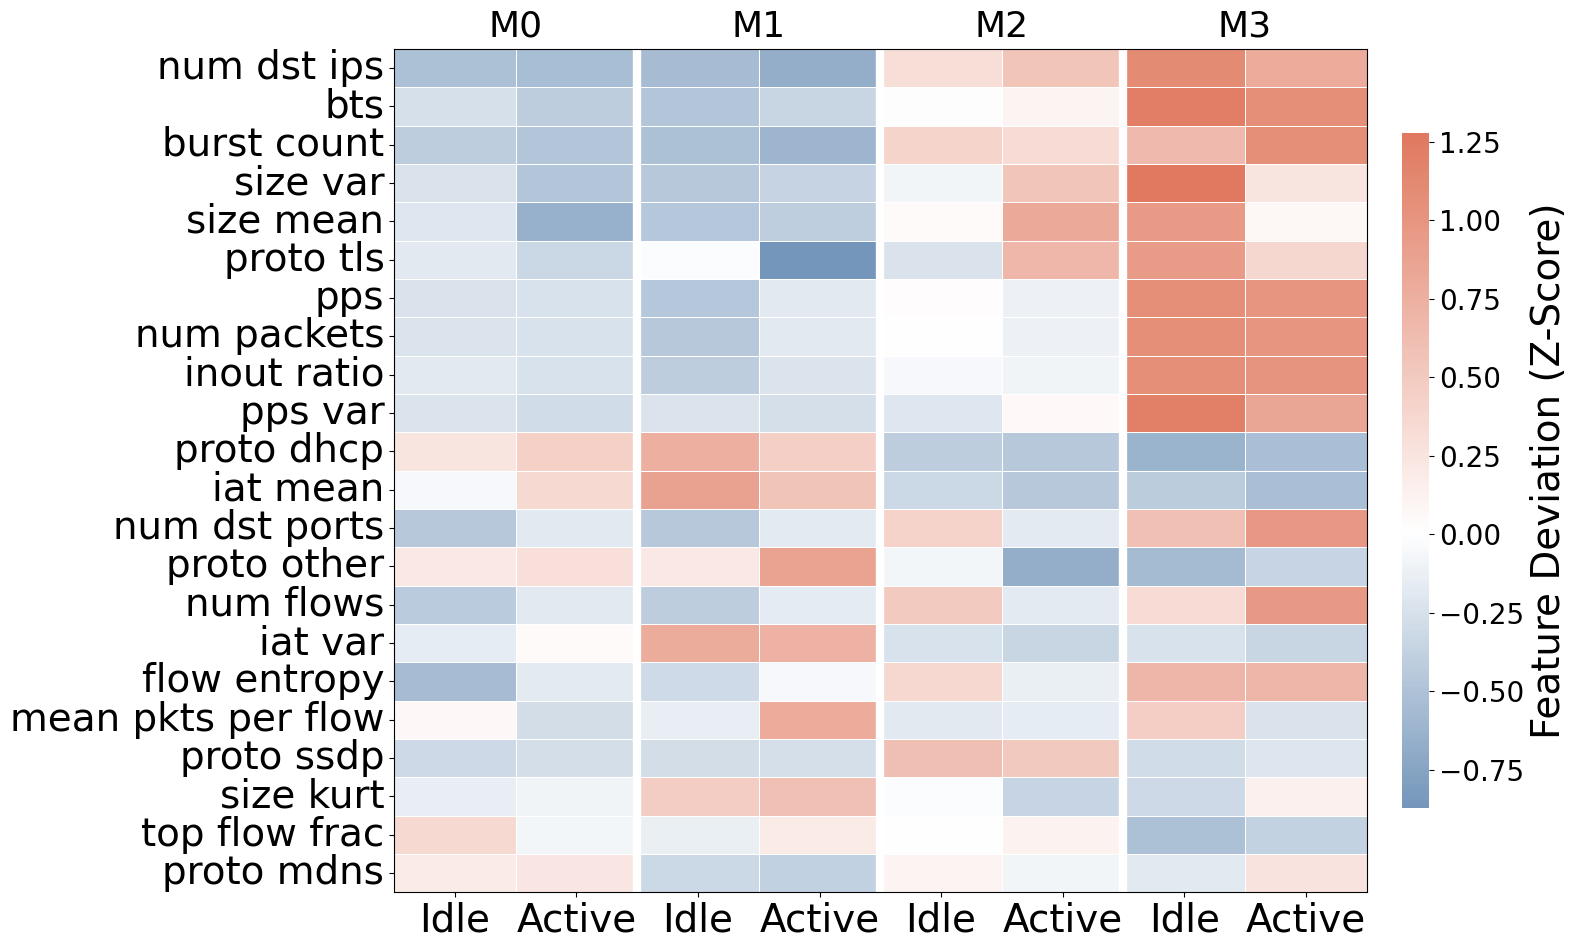

Mask Group                       0                   1                   2  \
State                         Idle    Active      Idle    Active      Idle   
num_dst_ips (I/A)        -0.516591 -0.539703 -0.546790 -0.666571  0.318007   
bts (I/A)                -0.256915 -0.414784 -0.484664 -0.336239 -0.010826   
burst_count (I/A)        -0.411136 -0.470979 -0.504152 -0.616904  0.397821   
size_var (I/A)           -0.227378 -0.474515 -0.450205 -0.364084 -0.087748   
size_mean (I/A)          -0.205895 -0.647781 -0.467559 -0.402918  0.047357   
proto_tls (I/A)          -0.181458 -0.328894 -0.031073 -0.871964 -0.239953   
pps (I/A)                -0.226832 -0.249970 -0.466308 -0.183058  0.021215   
num_packets (I/A)        -0.221859 -0.249939 -0.444772 -0.183023 -0.000741   
inout_ratio (I/A)        -0.183104 -0.248485 -0.411797 -0.223137 -0.050968   
pps_var (I/A)            -0.221999 -0.292790 -0.224868 -0.266627 -0.202018   
proto_dhcp (I/A)          0.240344  0.441235  0.757111  0.453604 -0.415969   
iat_mean (I/A)           -0.051049  0.364990  0.879949  0.562461 -0.322716   
num_dst_ports (I/A)      -0.453726 -0.186492 -0.449887 -0.169428  0.428556   
proto_other (I/A)         0.215896  0.302480  0.219158  0.869429 -0.079944   
num_flows (I/A)          -0.429244 -0.182474 -0.411587 -0.165567  0.497295   
iat_var (I/A)            -0.157254  0.045687  0.782496  0.724393 -0.242512   
flow_entropy (I/A)       -0.552789 -0.167483 -0.301313 -0.053780  0.377391   
mean_pkts_per_flow (I/A)  0.064616 -0.276628 -0.142425  0.793341 -0.182315   
proto_ssdp (I/A)         -0.316234 -0.271212 -0.283187 -0.259043  0.599132   
size_kurt (I/A)          -0.143683 -0.093337  0.471840  0.595377 -0.026658   
top_flow_frac (I/A)       0.355327 -0.077731 -0.139422  0.197461 -0.003415   
proto_mdns (I/A)          0.199589  0.232181 -0.321705 -0.382986  0.105038   

Mask Group                                 3            
State                       Active      Idle    Active  
num_dst_ips (I/A)         0.551619  1.099070  0.799044  
bts (I/A)                 0.103569  1.216176  1.072450  
burst_count (I/A)         0.340576  0.652876  1.056355  
size_var (I/A)            0.548955  1.278090  0.251048  
size_mean (I/A)           0.812940  0.962187  0.071177  
proto_tls (I/A)           0.680323  0.934313  0.381827  
pps (I/A)                -0.108142  1.059822  0.994132  
num_packets (I/A)        -0.108216  1.068027  0.994184  
inout_ratio (I/A)        -0.094154  1.054853  1.016499  
pps_var (I/A)             0.055043  1.203253  0.837764  
proto_dhcp (I/A)         -0.448936 -0.625510 -0.529859  
iat_mean (I/A)           -0.446781 -0.419856 -0.534507  
num_dst_ports (I/A)      -0.167144  0.594471  0.977901  
proto_other (I/A)        -0.665816 -0.562736 -0.357365  
num_flows (I/A)          -0.170441  0.340660  0.971713  
iat_var (I/A)            -0.343038 -0.247462 -0.350840  
flow_entropy (I/A)       -0.128038  0.697155  0.691941  
mean_pkts_per_flow (I/A) -0.149740  0.471256 -0.227993  
proto_ssdp (I/A)          0.508140 -0.289162 -0.212825  
size_kurt (I/A)          -0.358977 -0.314562  0.142895  
top_flow_frac (I/A)       0.115541 -0.507951 -0.375172  
proto_mdns (I/A)         -0.089652 -0.179875  0.269053

In [9]:
cluster_profiles = verify_mask_groups_compact(df_pat_clustered, FEATURE_PATH)
cluster_profiles